In [ ]:
!pip install qiskit --quiet --no-warn-conflicts
!pip install matplotlib --quiet --no-warn-conflicts
!pip install pylatexenc --quiet --no-warn-conflicts

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [15]:
import qiskit as qk
import numpy as np
import time 
import matplotlib as mpl

In [106]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = qk.QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate


def dj_algorithm(oracle, n):
    dj_circuit = qk.QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

# функция, которая симулирует цепочку алгоритма Дойчв-Йожа 1000 раз и выдаёт время симуляции
def simulation(aer_string):
  time_sim = np.zeros(1000)
  # симулируем цепь 1000 раз
  for i in range(1000):
    n = 10
    oracle_gate = dj_oracle('balanced', n)
    dj_circuit = dj_algorithm(oracle_gate, n)

    start = time.time()

    aer_sim = qk.Aer.get_backend(aer_string)

    transpiled_dj_circuit = qk.transpile(dj_circuit, aer_sim)
    results = aer_sim.run(transpiled_dj_circuit).result()
    answer = results.get_counts()
    #qk.visualization.plot_histogram(answer)

    end = time.time() - start
    #print(end, end = ' ')
    time_sim[i] = end
  out = "Время выполнения симуляции " + aer_string + ": " + str(np.average(time_sim))
  return out
  

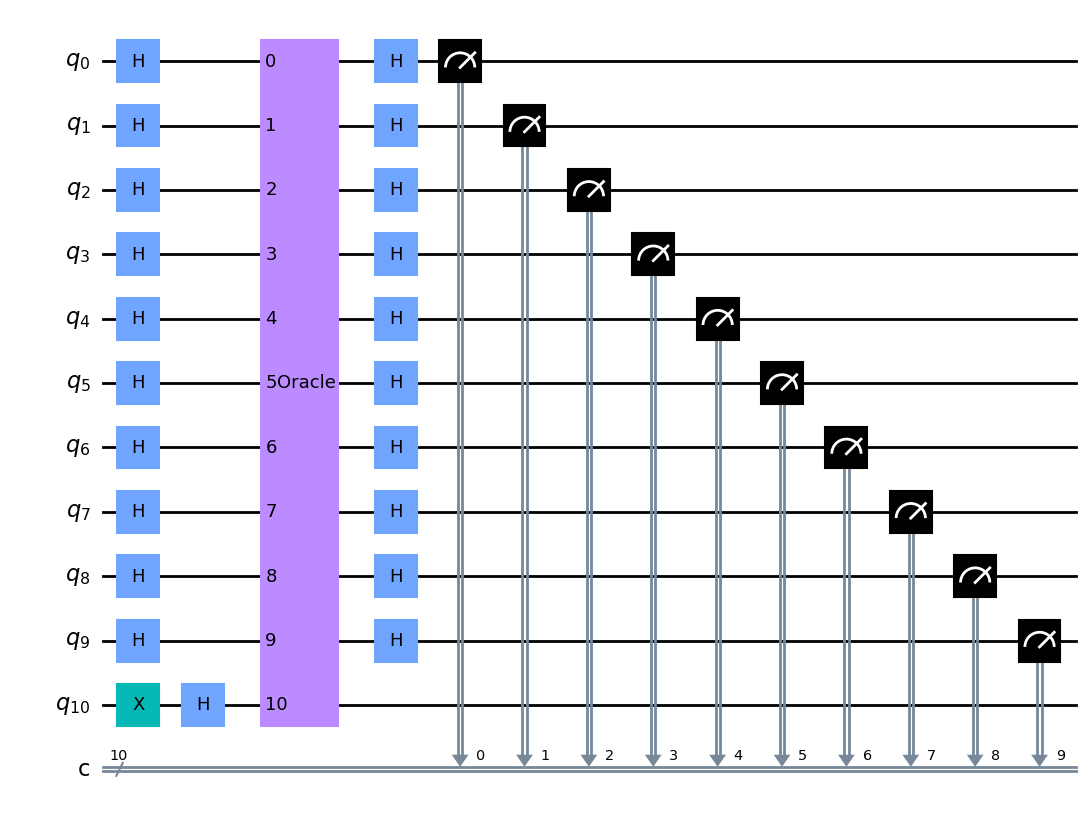

In [107]:
n = 10
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

QISKIT имеет несколько квантовых симуляторов, доступных в качестве бэкенда: 
1. local_qasm_simulator
2. local_state_vector_simulator
3. ibmq_qasm_simulator
4. local_unitary_simulator 
5. local_clifford_simulator. 

Исследуем каждый симулятор на примере алгоритма Дойча-Йожи. 


#**aer_simulator**


In [108]:
simulation('aer_simulator')

'Время выполнения симуляции aer_simulator: 0.02012196445465088'

#**aer_simulator_statevector**

In [109]:
simulation('aer_simulator_statevector')

'Время выполнения симуляции aer_simulator_statevector: 0.024329427003860475'

#**aer_simulator_stabilizer**

In [114]:
simulation('aer_simulator_stabilizer')

'Время выполнения симуляции aer_simulator_stabilizer: 0.018990967035293578'

#**aer_simulator_matrix_product_state**

In [115]:
simulation('aer_simulator_matrix_product_state')

'Время выполнения симуляции aer_simulator_matrix_product_state: 0.029700433969497682'

#**aer_simulator_extended_stabilizer**

In [121]:
simulation('aer_simulator_extended_stabilizer')

'Время выполнения симуляции aer_simulator_extended_stabilizer: 0.017826930046081543'

#**qasm_simulator**

In [122]:
simulation('qasm_simulator')

'Время выполнения симуляции qasm_simulator: 0.01752280282974243'

#**statevector_simulator**

In [123]:
simulation('statevector_simulator')

'Время выполнения симуляции statevector_simulator: 0.014218507766723633'